In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('fake-news/train.csv')

In [4]:
df.shape

(20800, 5)

In [5]:
df=df.dropna()

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
X=df.drop('label', axis=1)

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
y=df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
df.shape

(18285, 5)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

In [13]:
msgs=df.copy()

In [14]:
msgs.reset_index(inplace=True)

In [15]:
msgs.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [17]:
ps=PorterStemmer()
corpus=[]

In [18]:
len(msgs)

18285

In [19]:
len(msgs.index)

18285

In [20]:
for i in range(0,len(msgs)):
    review=re.sub('[^a-zA-Z]', ' ', msgs['text'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [21]:
X.shape

(18285, 4)

In [22]:
y=msgs['label']

In [23]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()


In [25]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [27]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [28]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [29]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Naive Bayes Algo 

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [33]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


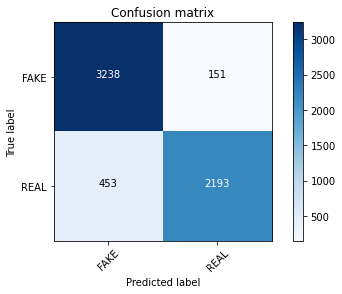

In [34]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.899917149958575

In [36]:
y_train.shape

(12250,)

## Passive Aggressive Classifier

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.952
Confusion matrix, without normalization


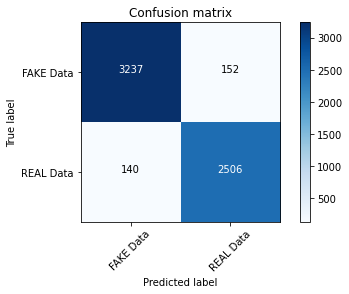

In [39]:
linear_clf.fit(X_train, y_train)
pred=linear_clf.predict(X_test)
score=metrics.accuracy_score(pred, y_test)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Multinomial Classifier with Hyperparameter

In [40]:
classifier=MultinomialNB(alpha=0.1)

In [41]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/home/ajay/.local/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.9022369511184756
Alpha: 0.1, Score : 0.9017398508699255
Alpha: 0.2, Score : 0.9020712510356255
Alpha: 0.30000000000000004, Score : 0.9022369511184756
Alpha: 0.4, Score : 0.9020712510356255
Alpha: 0.5, Score : 0.9014084507042254
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9012427506213753
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9005799502899752


In [44]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [45]:
classifier.coef_[0]

array([-9.52147382, -8.98567005, -8.75019038, ..., -9.00768675,
       -8.29304531, -8.47560634])

In [46]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.400573176146374, 'clinton'),
 (-5.504449523154856, 'trump'),
 (-5.689699395630465, 'hillari'),
 (-5.927658316663332, 'us'),
 (-5.943924155634382, 'elect'),
 (-6.141141898356725, 'peopl'),
 (-6.153679149791046, 'vote'),
 (-6.1855372689534684, 'state'),
 (-6.209385038898738, 'email'),
 (-6.231070569259119, 'one'),
 (-6.304754452471091, 'hillari clinton'),
 (-6.30763946084777, 'fbi'),
 (-6.325864550609382, 'would'),
 (-6.334934576217139, 'like'),
 (-6.373788650596871, 'american'),
 (-6.392869520601681, 'time'),
 (-6.398029580588211, 'war'),
 (-6.415258514684247, 'world'),
 (-6.450564452209334, 'year'),
 (-6.459455119306126, 'octob')]

In [47]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.991740188222842, 'brief post'),
 (-10.991740188222842, 'follow pam'),
 (-10.991740188222842, 'follow pam key'),
 (-10.991740188222842, 'gold medal'),
 (-10.991740188222842, 'gorsuch'),
 (-10.991740188222842, 'judg gorsuch'),
 (-10.991740188222842, 'key twitter'),
 (-10.991740188222842, 'key twitter pamkeynen'),
 (-10.991740188222842, 'morn brief'),
 (-10.991740188222842, 'mr ail'),
 (-10.991740188222842, 'mr bannon'),
 (-10.991740188222842, 'mr castro'),
 (-10.991740188222842, 'mr christi'),
 (-10.991740188222842, 'mr cruz'),
 (-10.991740188222842, 'mr de'),
 (-10.991740188222842, 'mr flynn'),
 (-10.991740188222842, 'mr kushner'),
 (-10.991740188222842, 'mr roof'),
 (-10.991740188222842, 'mr sander'),
 (-10.991740188222842, 'mr scott'),
 (-10.991740188222842, 'mr session'),
 (-10.991740188222842, 'mr spicer'),
 (-10.991740188222842, 'mr xi'),
 (-10.991740188222842, 'ms trump'),
 (-10.991740188222842, 'pam key'),
 (-10.991740188222842, 'pam key twitter'),
 (-10.991740188222842, 'p

## Hashing Vectorizer

In [64]:
hs_vectorizer=HashingVectorizer(n_features=5000,binary=True)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [65]:
X.shape

(18285, 5000)

In [66]:
X

array([[0.        , 0.06299408, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06131393, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04873702, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.048795  , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.855
Confusion matrix, without normalization


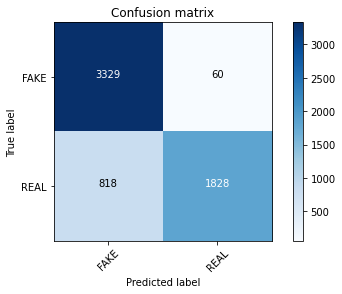

In [68]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])